# **Food Image Classification Case Study**

**Context:**
Image classification has become less complicated with deep learning and the availability
of larger datasets and computational assets. The Convolution neural network is the most popular
and extensively used image classification technique in the latest day.
Snippet Ltd. is a stock photography company and is an online source of images available for people and companies to download. Photographers from all over the world upload food-
related images to the stock photography agency every day. Since the volume of the images that get uploaded daily will be high, it will be difficult for anyone to label the images manually.

**Objective:**
Snippet Ltd. have decided to use only three categories of food (Bread, Soup,
and Vegetables -Fruits) for now, and you as a data scientist at Snippet Ltd. , need to build a
classification model using a dataset consisting of images that would help to label the images into
different categories using CNN.

**Dataset:**
The dataset folder contains different food images. The images are already split into Training and

Testing folders. Each folder has four subfolders named `Bread`,

# **Data Loading and Pre-Processing**

In [3]:
!pip install tensorflow keras numpy matplotlib pillow

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Predictive Analysis/Practical10/Copy of Food_Images.zip'

# Specify the directory where you want to unzip the file
unzip_dir = '/content/drive/MyDrive/Predictive Analysis/Practical10'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f"Unzipped files are stored in: {unzip_dir}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unzipped files are stored in: /content/drive/MyDrive/Predictive Analysis/Practical10


In [8]:
train_dir = '/content/drive/MyDrive/Predictive Analysis/Practical10/Food_Data/Training'
test_dir = '/content/drive/MyDrive/Predictive Analysis/Practical10/Food_Data/Testing'

**Image Augmentation**

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
batch_size = 32
img_size = (150, 150)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3203 images belonging to 3 classes.
Found 1094 images belonging to 3 classes.


# **CNN Model**

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: Bread, Soup, Vegetables-Fruits
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.4298 - loss: 1.3046 - val_accuracy: 0.5708 - val_loss: 0.8912
Epoch 2/15
  1/100 ━━━━━━━━━━━━━━━━━━━━ 2:46 2s/step - accuracy: 0.7812 - loss: 0.6640

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 223ms/step - accuracy: 0.7812 - loss: 0.6640 - val_accuracy: 0.6020 - val_loss: 0.8083
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.6121 - loss: 0.7931 - val_accuracy: 0.6608 - val_loss: 0.7177
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 240ms/step - accuracy: 0.5625 - loss: 0.8096 - val_accuracy: 0.6618 - val_loss: 0.7328
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.6540 - loss: 0.7303 - val_accuracy: 0.7224 - val_loss: 0.6401
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 228ms/step - accuracy: 0.5625 - loss: 0.7207 - val_accuracy: 0.7436 - val_loss: 0.6176
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.6737 - loss: 0.6918 - val_accuracy: 0.7381 - val_loss: 0.5781
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 237ms/step - accuracy: 0.5625 - loss: 0.6525 - val_accuracy: 0.7528 - val_loss: 0.5972
Epoch 9/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.7143 - loss: 0.6479 - val_accurac

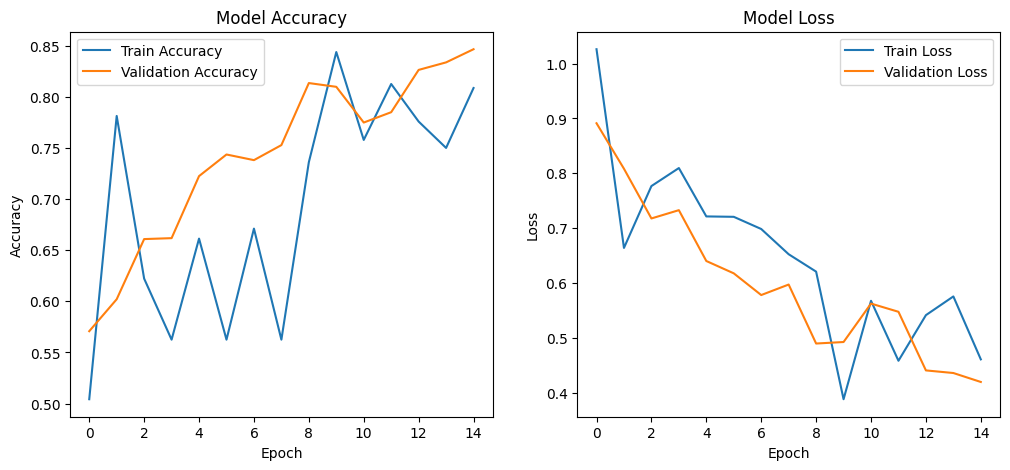

In [14]:
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Evaluate the Model**

In [15]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 751ms/step - accuracy: 0.7879 - loss: 0.5060
Test Accuracy: 84.64%


35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 674ms/step
                 precision    recall  f1-score   support

          Bread       0.84      0.73      0.78       362
           Soup       0.83      0.93      0.88       500
Vegetable-Fruit       0.90      0.86      0.88       232

       accuracy                           0.85      1094
      macro avg       0.86      0.84      0.84      1094
   weighted avg       0.85      0.85      0.84      1094



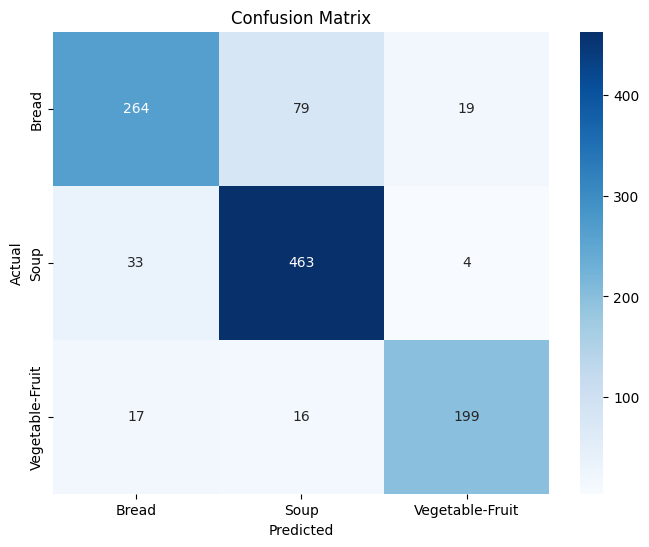

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# True classes
y_true = test_generator.classes

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()